In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed(1234)
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('df_for_clustering.csv',index_col=0)

X=df.drop(columns='LOAN_DEFAULT')
y=df['LOAN_DEFAULT']

pd.set_option('display.max_columns', None)
X.head(3)

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,DISBURSAL_MONTH,DISBURSAL_DAY,EMPLOYMENT_TYPE_SALARIED,EMPLOYMENT_TYPE_SELF_EMPLOYED,AGE
UNIQUEID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
420825,50578,58400,89.55,67,22807,45,1441,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,8,1,0,39
537409,47145,65550,73.23,67,22807,45,1502,6,1998,1,0,0,0,0,598,4,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,23,23,0,9,26,0,1,37
417566,53278,61360,89.63,67,22807,45,1497,6,1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0,1,37


In [3]:
print(f'The dataset has {X.shape[0]} rows and {X.shape[1]} columns.')

The dataset has 233154 rows and 40 columns.


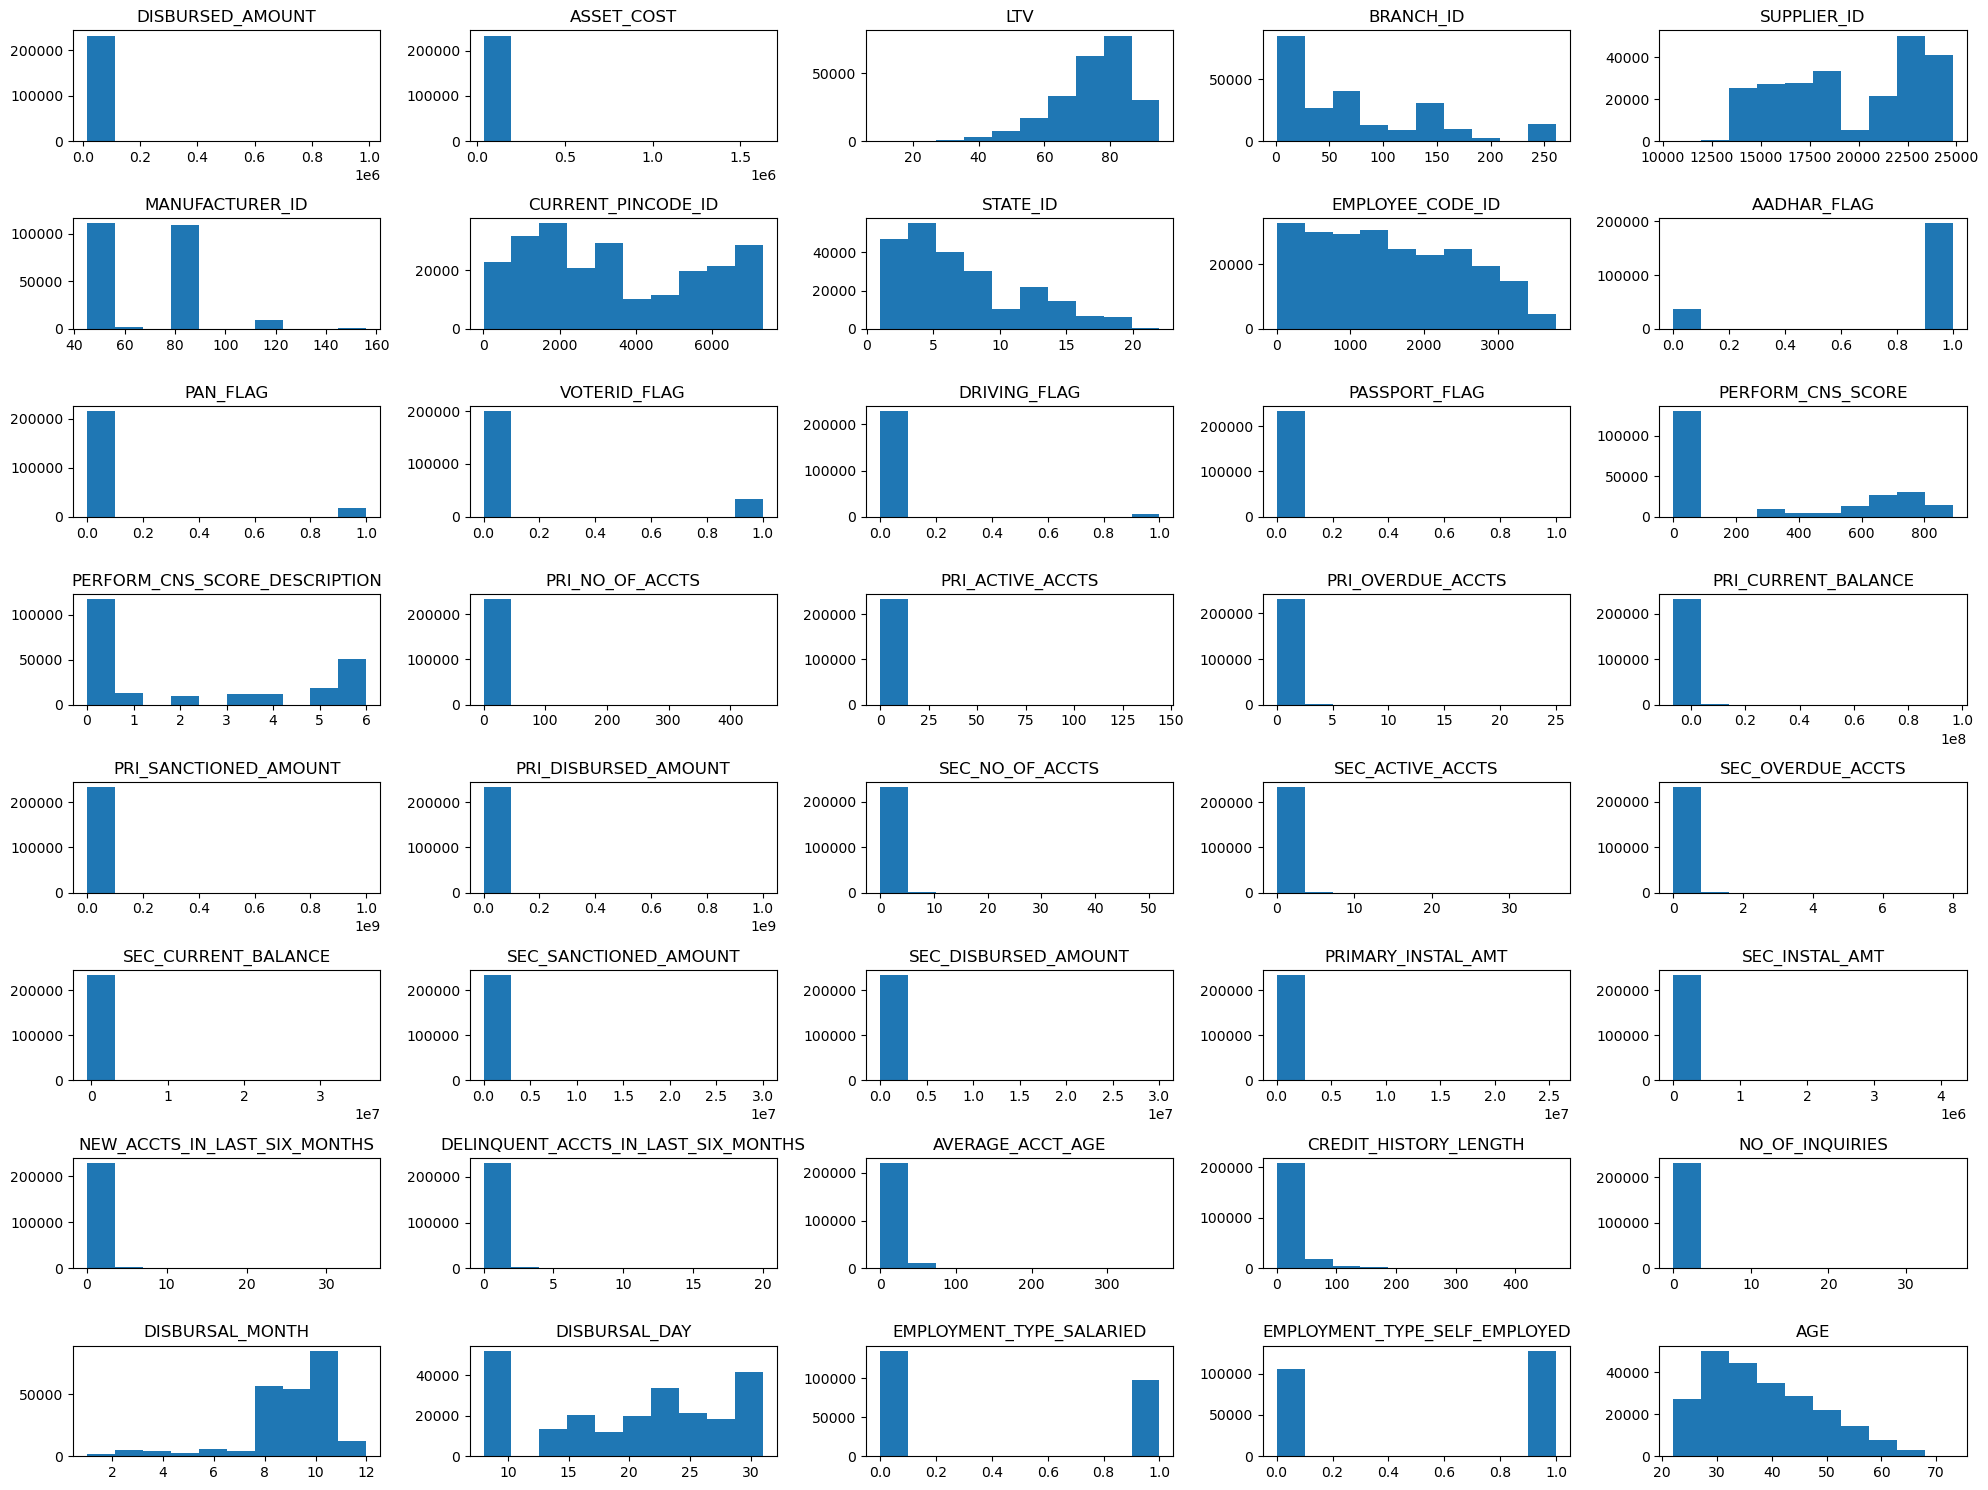

In [4]:
# Plot histogram distribution for each feature
plt.subplots(8,5, figsize=(20,15))
for i in range (40):
    plt.subplot(8,5,i+1)
    plt.hist(X.iloc[:,i])
    plt.title(X.iloc[:,i].name)
plt.tight_layout()
plt.show()

We already have the answer key, which is `LOAN_DEFAULT` column, therefore we will base our two clusters (Default and Non-default borrowers) on this. 

From the distribution of all features above, it is seen that most columns are right-skewed, thus median would be used, instead of mean, to compare between classes.

### Scaling

In [5]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [6]:
X_final = pd.DataFrame(data=X_scaled, columns=X.columns)
X_final['Class'] = y.values
X_final.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,DISBURSAL_MONTH,DISBURSAL_DAY,EMPLOYMENT_TYPE_SALARIED,EMPLOYMENT_TYPE_SELF_EMPLOYED,AGE,Class
0,-0.291335,-0.921895,1.292133,-0.085002,0.907336,-1.085216,-0.873885,-0.281611,0.459901,0.435916,-0.285929,-0.411719,-0.154257,-0.046172,-0.855453,-0.866991,-0.467804,-0.535617,-0.285264,-0.176064,-0.092010,-0.091711,-0.094259,-0.087651,-0.065216,-0.031884,-0.039835,-0.039323,-0.086581,-0.020784,-0.399782,-0.253566,-0.590198,-0.568640,-0.292450,-3.258261,-1.594013,1.175829,-1.099815,0.032857,0
1,-0.555997,-0.544482,-0.132372,-0.085002,0.907336,-1.085216,-0.846631,-0.281611,0.459901,0.435916,-0.285929,-0.411719,-0.154257,-0.046172,0.911822,0.705441,-0.276131,-0.020549,1.536941,-0.146773,-0.070871,-0.070599,-0.094259,-0.087651,-0.065216,-0.031884,-0.039835,-0.039323,-0.073427,-0.020784,-0.399782,2.347632,0.932337,0.236085,-0.292450,0.114617,0.770546,-0.850464,0.909244,-0.170040,1
2,-0.083183,-0.765651,1.299116,-0.085002,0.907336,-1.085216,-0.848865,-0.281611,0.459901,0.435916,-0.285929,-0.411719,-0.154257,-0.046172,-0.855453,-0.866991,-0.467804,-0.535617,-0.285264,-0.176064,-0.092010,-0.091711,-0.094259,-0.087651,-0.065216,-0.031884,-0.039835,-0.039323,-0.086581,-0.020784,-0.399782,-0.253566,-0.590198,-0.568640,-0.292450,-4.382554,-1.594013,-0.850464,0.909244,-0.170040,0
3,0.243307,-0.514764,1.198738,-0.085002,0.907336,-1.085216,-0.847077,-0.281611,0.459901,0.435916,-0.285929,-0.411719,-0.154257,-0.046172,0.045917,-0.080775,0.107215,-0.535617,-0.285264,-0.176064,-0.092010,-0.091711,-0.094259,-0.087651,-0.065216,-0.031884,-0.039835,-0.039323,-0.086376,-0.020784,-0.399782,-0.253566,-0.060621,-0.043819,1.122986,0.676763,0.770546,-0.850464,0.909244,-0.981631,1
4,-0.152567,-0.821604,1.190882,-0.085002,0.907336,-1.085216,-0.849758,-0.281611,0.459901,0.435916,-0.285929,-0.411719,-0.154257,-0.046172,-0.855453,-0.866991,-0.467804,-0.535617,-0.285264,-0.176064,-0.092010,-0.091711,-0.094259,-0.087651,-0.065216,-0.031884,-0.039835,-0.039323,-0.086581,-0.020784,-0.399782,-0.253566,-0.590198,-0.568640,1.122986,0.114617,0.770546,-0.850464,0.909244,0.641550,1


### Comparing medians between classes

In [7]:
# calculate medians and group by classes
relative_medians = X_final.groupby('Class').median()

# change the DataFrame format from wide to long
melted_relative_medians = relative_medians.reset_index().melt(id_vars='Class')

# sort by values
melted_relative_medians.sort_values("value", ascending=False).head(10)

,Class,variable,value
77,1,EMPLOYMENT_TYPE_SELF_EMPLOYED,0.909244
76,0,EMPLOYMENT_TYPE_SELF_EMPLOYED,0.909244
10,0,MANUFACTURER_ID,0.766530
19,1,AADHAR_FLAG,0.435916
18,0,AADHAR_FLAG,0.435916
5,1,LTV,0.376505
9,1,SUPPLIER_ID,0.274450
73,1,DISBURSAL_DAY,0.245089
8,0,SUPPLIER_ID,0.186247
71,1,DISBURSAL_MONTH,0.114617


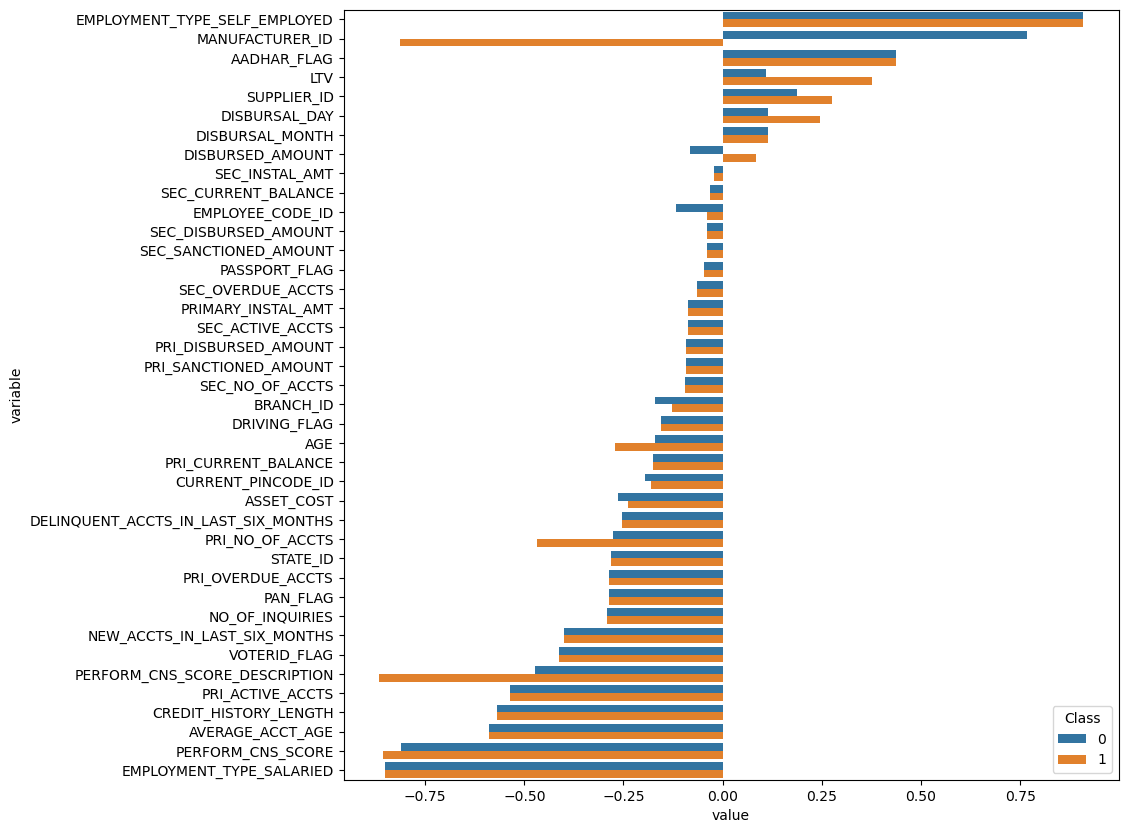

In [8]:
# plot it
plt.figure(figsize=(10, 10))
sns.barplot(data=melted_relative_medians.sort_values("value", ascending=False),
            x="value", 
            y="variable", 
            hue="Class")
plt.show()

### Characteristics of default borrowers

There is no clear difference between classes in terms of personal information (i.e employment type), however, based on the distinction in `MANUFACTURER_ID`, `LTV`, `DISBURSED_AMOUNT`, `PRI_NO_OF_ACCTS` and `PERFORM_CNS_SCORE_DESCRIPTION`, we can tell the default group apart by following characteristics:

- Higher loan to value of the asset (`LTV`)
- Higher disbursed amount
- Lower rank in CNS score (`PERFORM_CNS_SCORE_DESCRIPTION`)
- Fewer loans taken by themselves at the time of disbursement (`PRI_NO_OF_ACCTS`)
- Vehicle manufacturers with small ID